# 🌸 KNN with Flowers 🌸

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<IPython.core.display.Javascript object>

In [4]:
iris["species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

<IPython.core.display.Javascript object>

## Viz Practice

Use seaborn to make a `scatterplot` of `'sepal length (cm)'` by `'sepal width (cm)'`, colored by the species.

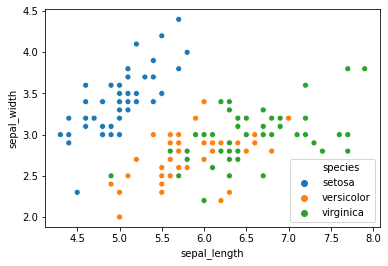

<IPython.core.display.Javascript object>

In [5]:
sns.scatterplot("sepal_length", "sepal_width", hue="species", data=iris)
plt.show()

Use seaborn to make a `scatterplot` of `'petal length (cm)'` by `'petal width (cm)'`, colored by the species.

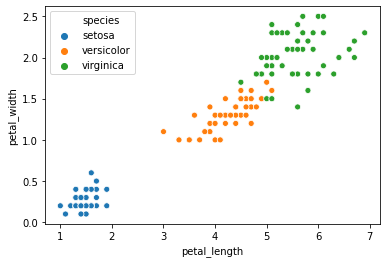

<IPython.core.display.Javascript object>

In [6]:
sns.scatterplot("petal_length", "petal_width", hue="species", data=iris)
plt.show()

### Data prep
Separate out your `X` and you `y`.  The species is our target variable.

* Perform a train test split
  * Stratify the split by `y` to ensure equal representation of each class in train and test

In [7]:
X = iris.drop(columns="species")
y = iris["species"]

<IPython.core.display.Javascript object>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<IPython.core.display.Javascript object>

## Programming Practice

Euclidean distance for 2d data is shown below.  In the formula, $a = (x_1, y_1)$ and $b = (x_2, y_2)$

$$dist(a, b) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

An example when $a = (1, 1)$ & $b = (4, 4)$.

$$dist(a, b) = \sqrt{(1 - 4)^2 + (1 - 4)^2} = \sqrt{(9 + 9)} \approx 4.24$$

Step 1:
* Recreate the input & output from the formula/example shown above
    * `a` and `b` are defined for you, recreate the ~`4.24` output

In [9]:
a = (1, 1)
b = (4, 4)

<IPython.core.display.Javascript object>

In [10]:
(a[0] - b[0]) ** 2

9

<IPython.core.display.Javascript object>

In [11]:
(a[1] - b[1]) ** 2

9

<IPython.core.display.Javascript object>

In [12]:
(a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2

18

<IPython.core.display.Javascript object>

In [13]:
np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

4.242640687119285

<IPython.core.display.Javascript object>

Step 2:
* Make the process you've written work for $n$d points
* Use the same test case as before to confirm the process works

*Hint 1: the [`zip()`](https://data-flair.training/blogs/python-zip-function/) function could be a potential step towards accomplishing this*

*Hint 2: converting the inputs to numpy arrays can make this even simpler*

In [14]:
a = np.array(a)
b = np.array(b)

sum_of_sq_dists = np.sum((a - b) ** 2)
np.sqrt(sum_of_sq_dists)

4.242640687119285

<IPython.core.display.Javascript object>

Step 3:
* Convert the logic you wrote in step 2 into a function

In [15]:
def euclid_dist(a, b):
    a = np.array(a)
    b = np.array(b)

    sum_of_sq_dists = np.sum((a - b) ** 2)
    dist = np.sqrt(sum_of_sq_dists)

    return dist

<IPython.core.display.Javascript object>

In [16]:
euclid_dist((1, 1), (4, 4))

4.242640687119285

<IPython.core.display.Javascript object>

* Use your function to measure the euclidean distance between the first two rows of `X`

In [17]:
X_train.iloc[0, :]

sepal_length    4.4
sepal_width     2.9
petal_length    1.4
petal_width     0.2
Name: 8, dtype: float64

<IPython.core.display.Javascript object>

In [18]:
X_train.iloc[1, :]

sepal_length    4.9
sepal_width     2.5
petal_length    4.5
petal_width     1.7
Name: 106, dtype: float64

<IPython.core.display.Javascript object>

In [19]:
row1 = X_train.iloc[0, :]
row2 = X_train.iloc[1, :]

euclid_dist(row1, row2)

3.502855977627399

<IPython.core.display.Javascript object>

## Theory Practice

Plot boxplots for each of your `X` features.

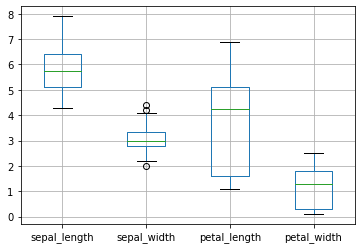

<IPython.core.display.Javascript object>

In [20]:
X_train.boxplot()
plt.show()

Plot the same scatterplots from before with standardized axis ranges.  Set all the axes to be `(0, 8)`.

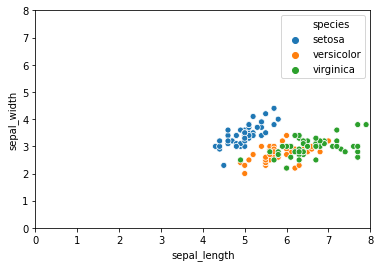

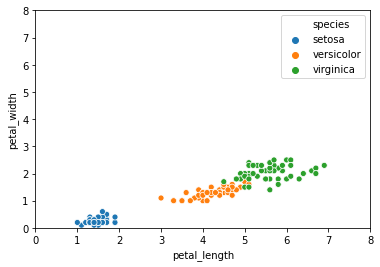

<IPython.core.display.Javascript object>

In [21]:
ax = sns.scatterplot("sepal_length", "sepal_width", hue="species", data=iris)
ax.set(xlim=(0, 8), ylim=(0, 8))
plt.show()

ax = sns.scatterplot("petal_length", "petal_width", hue="species", data=iris)
ax.set(xlim=(0, 8), ylim=(0, 8))
plt.show()

What's the issue with this?

We need to be sure to scale the data or the distance between a larger scale variable will dominate the classifications.

* Scale the data with the `StandardScaler()`

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [24]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,-1.721568,-0.332101,-1.345722,-1.323276
1,-1.124492,-1.227655,0.414505,0.651763


<IPython.core.display.Javascript object>

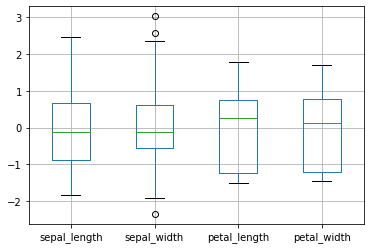

<IPython.core.display.Javascript object>

In [25]:
X_train.boxplot()
plt.show()

* Fit a `KNeighborsClassifier()` and assess the accuracy/overfitting

In [28]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<IPython.core.display.Javascript object>

In [29]:
model.score(X_train, y_train)

0.975

<IPython.core.display.Javascript object>

In [30]:
model.score(X_test, y_test)

0.9333333333333333

<IPython.core.display.Javascript object>

* Fit a `KNeighborsClassifier()` with `n_neighbors` set to `1` and assess the accuracy/overfitting

In [31]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

<IPython.core.display.Javascript object>

In [32]:
model.score(X_train, y_train)

1.0

<IPython.core.display.Javascript object>

In [33]:
model.score(X_test, y_test)

0.9666666666666667

<IPython.core.display.Javascript object>

* Fit a `KNeighborsClassifier()` with `n_neighbors` set to `20` and assess the accuracy/overfitting

In [34]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

<IPython.core.display.Javascript object>

In [35]:
model.score(X_train, y_train)

0.9583333333333334

<IPython.core.display.Javascript object>

In [36]:
model.score(X_test, y_test)

0.9666666666666667

<IPython.core.display.Javascript object>

* Write a `for` loop to assess the accuracy of `n_neighbors` on train & test for values 1 through 50.
* Store the train & test accuracies from each iteration
* Interpret the plot

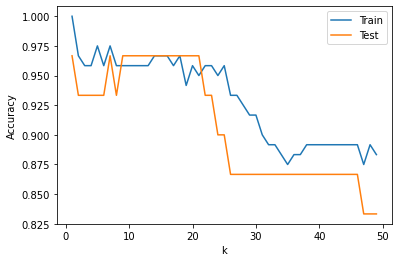

<IPython.core.display.Javascript object>

In [37]:
ks = range(1, 50)
train_scores = []
test_scores = []

for k in ks:
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)


plt.plot(ks, train_scores, label="Train")
plt.plot(ks, test_scores, label="Test")
plt.xlabel("k")  # label x axis
plt.ylabel("Accuracy")  # label y axis
plt.legend()  # Display a legend
plt.show()